# Krista, working on linking CO and KO
#from HA species...2/10/2016 
#this version is keeping the plotting pieces - for bar graphs and the like at the end so I don't have
#to recreate that...also has the BioKEGG code as examples

In [1]:
import pandas as pd
import urllib2
from bs4 import BeautifulSoup
import re
from sklearn.cluster import KMeans
import palettable as pal
from itertools import chain
import os
import os.path #? not sure if I need both
import glob
import numpy as np
from IPython.core.debugger import Tracer #used this to step into the function and debug it, also need line with Tracer()() 

import matplotlib.pyplot as plt
import matplotlib as mpl #KL moved this here 2/12/2016
#BUT...then messes with the plotting
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline
from collections import Counter
import cPickle as cpk

from stackedBarGraph import StackedBarGrapher
SBG = StackedBarGrapher()



In [ ]:
#since notebook is just keeping the plotting examples, can start by reading in the data in gatherCounts

In [351]:
#and now...read in the file...can use this without having to go through the pain of rerunning gatherCounts
gatherCounts = cpk.load(open('gatherCounts_norm2mean.2016.03.31.pickle','rb'))
gatherCounts.head(2)

,nCpds,nGenes,Km0_cpd,Km0_gene,Km1_cpd,Km1_gene,Km2_cpd,Km2_gene,Km3_cpd,Km3_gene,Km4_cpd,Km4_gene,Km5_cpd,Km5_gene,pathwayInfo,pathwayGroup_A,pathwayGroup_B,pathwayGroup_C
ko00010,31,96,1,0,0,1,0,1,0,14,3,0,0,0,Glycolysis / Gluconeogenesis,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis
ko00020,20,57,0,2,0,2,0,0,3,16,2,0,0,1,Citrate cycle (TCA cycle),Metabolism,Carbohydrate metabolism,Citrate cycle (TCA cycle)


In [352]:
colLabel

['nCpds',
 'nGenes',
 'Km0_cpd',
 'Km0_gene',
 'Km1_cpd',
 'Km1_gene',
 'Km2_cpd',
 'Km2_gene',
 'Km3_cpd',
 'Km3_gene',
 'Km4_cpd',
 'Km4_gene',
 'Km5_cpd',
 'Km5_gene']

In [353]:
newCols = colLabel[2:]

In [354]:
cpdCols = colLabel[2::2]
cpdCols 

['Km0_cpd', 'Km1_cpd', 'Km2_cpd', 'Km3_cpd', 'Km4_cpd', 'Km5_cpd']

In [355]:
geneCols = colLabel[3::2]
geneCols

['Km0_gene', 'Km1_gene', 'Km2_gene', 'Km3_gene', 'Km4_gene', 'Km5_gene']

In [356]:
#only keep the ones where I have some value...no sense in tracking zeros
s = gatherCounts[(gatherCounts.loc[:,newCols].values > 0).any(axis=1)]
pGroup = pd.unique(s.pathwayGroup_A.ravel())

In [357]:
dfHighest = pd.DataFrame(index = pGroup,columns = newCols)
#do the math - add up the genes/cpds by higher level grouping
for i, group in s.groupby('pathwayGroup_A'):
    d2 = group.loc[:,newCols]
    out = d2.sum(axis=0)
    dfHighest.loc[i,newCols] = out

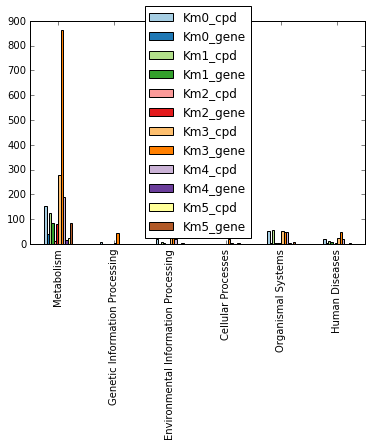

In [358]:
# playing around with color palettes
useColors = pal.colorbrewer.qualitative.Paired_12.hex_colors
dfHighest.plot(kind = 'bar',color=useColors)

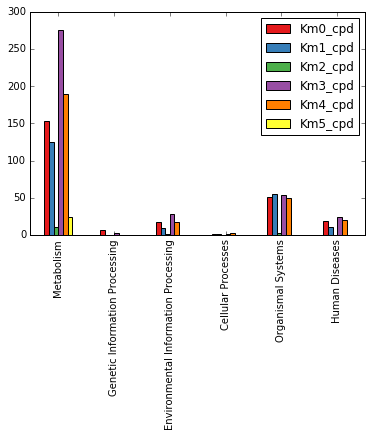

In [359]:
useColors = pal.colorbrewer.qualitative.Set1_6.hex_colors
toPlot = dfHighest.loc[:,cpdCols]
toPlot.plot(kind = 'bar',color = useColors)

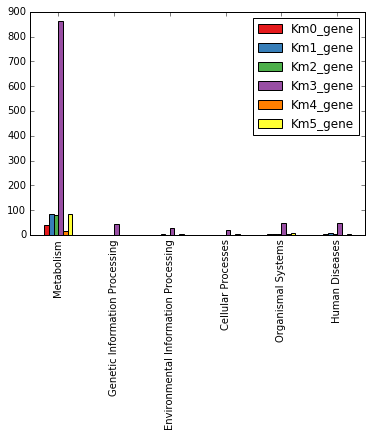

In [360]:
useColors = pal.colorbrewer.qualitative.Set1_6.hex_colors
toPlot = dfHighest.loc[:,geneCols]
toPlot.plot(kind = 'bar',color = useColors)

In [361]:
##let's narrow in on the metabolism group since that is the only one that is really interesting
plotMetabolism = gatherCounts[gatherCounts.loc[:,'pathwayGroup_A']=='Metabolism']

In [362]:
s = plotMetabolism[(plotMetabolism.loc[:,newCols].values > 0).any(axis=1)]
dataToPlot = s.loc[:,newCols]

pGroup = pd.unique(plotMetabolism.pathwayGroup_B.ravel())

newDFmtab = pd.DataFrame(index = pGroup,columns = newCols)

for i, group in s.groupby('pathwayGroup_B'):
    d2 = group.loc[:,newCols]
    out = d2.sum(axis=0)
    newDFmtab.loc[i,newCols] = out

In [363]:
s.head(5)

,nCpds,nGenes,Km0_cpd,Km0_gene,Km1_cpd,Km1_gene,Km2_cpd,Km2_gene,Km3_cpd,Km3_gene,Km4_cpd,Km4_gene,Km5_cpd,Km5_gene,pathwayInfo,pathwayGroup_A,pathwayGroup_B,pathwayGroup_C
ko00010,31,96,1,0,0,1,0,1,0,14,3,0,0,0,Glycolysis / Gluconeogenesis,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis
ko00020,20,57,0,2,0,2,0,0,3,16,2,0,0,1,Citrate cycle (TCA cycle),Metabolism,Carbohydrate metabolism,Citrate cycle (TCA cycle)
ko00030,35,76,0,0,0,0,0,1,0,2,2,0,0,2,Pentose phosphate pathway,Metabolism,Carbohydrate metabolism,Pentose phosphate pathway
ko00040,55,63,0,0,0,0,0,1,1,7,1,0,0,0,Pentose and glucuronate interconversions,Metabolism,Carbohydrate metabolism,Pentose and glucuronate interconversions
ko00051,53,97,0,1,4,0,0,0,6,11,7,0,0,0,Fructose and mannose metabolism,Metabolism,Carbohydrate metabolism,Fructose and mannose metabolism


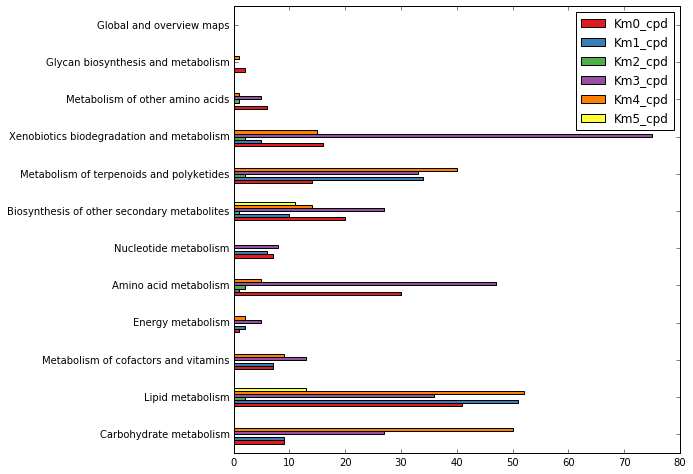

In [364]:
useColors = pal.colorbrewer.qualitative.Set1_6.hex_colors
toPlot_cpds = newDFmtab.loc[:,cpdCols]
toPlot_cpds.plot(kind = 'barh',color=useColors,figsize=(8,8))
# toPlot_cpds.to_csv('compounds_byKmeans.csv')

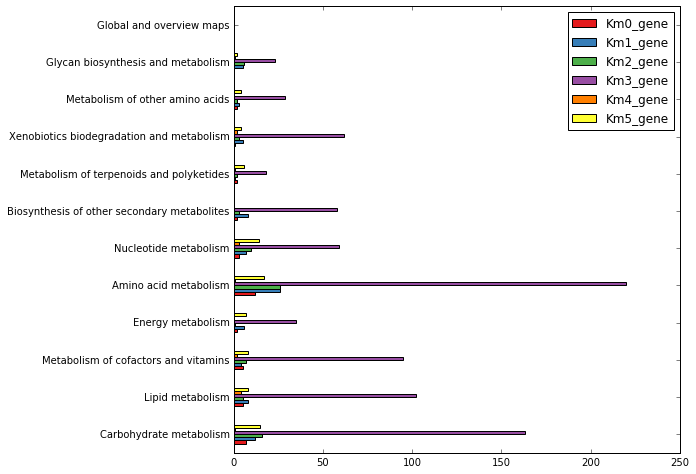

In [365]:
useColors = pal.colorbrewer.qualitative.Set1_6.hex_colors
toPlot_cpds = newDFmtab.loc[:,geneCols]
toPlot_cpds.plot(kind = 'barh',color=useColors,figsize = (8,8))

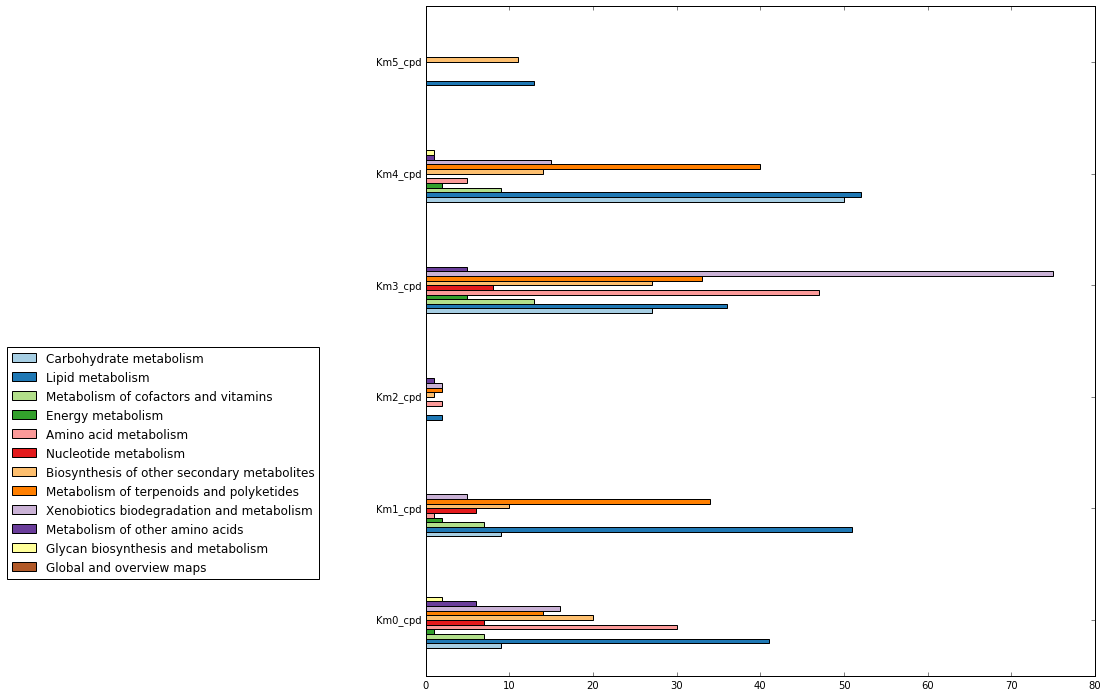

In [366]:
useColors = pal.colorbrewer.qualitative.Paired_12.hex_colors
toPlot_cpds = newDFmtab.loc[:,cpdCols]
toPlot_cpds.T.plot(kind = 'barh',color=useColors,figsize = (12,12))
plt.legend(bbox_to_anchor=([-0.15, 0.5]))

In [367]:
s = plotMetabolism[(plotMetabolism.loc[:,newCols].values > 0).any(axis=1)]
pGroup = pd.unique(plotMetabolism.pathwayInfo.ravel())
newDFmtabLower = pd.DataFrame(index = pGroup,columns = newCols)

for i, group in s.groupby('pathwayInfo'):
    d2 = group.loc[:,newCols]
    out = d2.sum(axis=0)
    newDFmtabLower.loc[i,newCols] = out

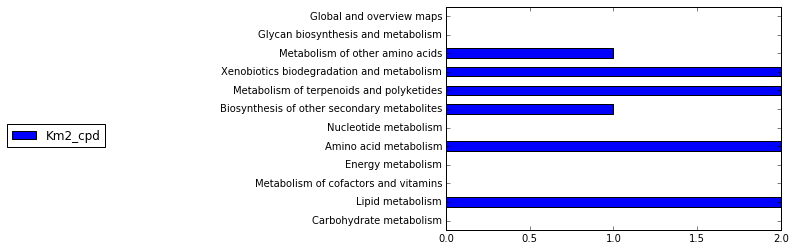

In [368]:
testing = toPlot_cpds.loc[:,'Km2_cpd']
testing.plot(kind = 'barh',color = 'blue')
plt.legend(bbox_to_anchor=([-1, 0.5]))

In [369]:
toPlot_cpds_proportion=toPlot_cpds.copy()
toPlot_cpds['sum']=toPlot_cpds.sum(axis=1)

for i in toPlot_cpds_proportion.columns:
    toPlot_cpds_proportion[i]=toPlot_cpds[i]/toPlot_cpds['sum']
    
toPlot_cpds=toPlot_cpds.T.drop('sum').T

In [370]:
#what about the genes?
toPlot_genes = newDFmtab.loc[:,geneCols]
toPlot_genes_proportion=toPlot_genes.copy()
toPlot_genes['sum']=toPlot_genes.sum(axis=1)
for i in toPlot_genes_proportion.columns:
    toPlot_genes_proportion[i]=toPlot_genes[i]/toPlot_genes['sum']
    
toPlot_genes=toPlot_genes.T.drop('sum').T
#toPlot_genes.to_csv('genes_byKmeans.csv')

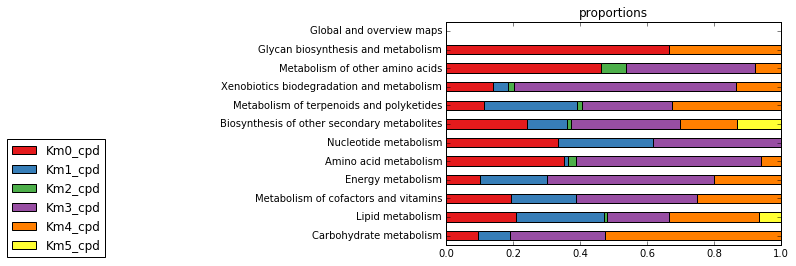

In [371]:
#can play around with the colors
useColors = pal.colorbrewer.qualitative.Set1_6.hex_colors
toPlot_cpds_proportion.plot(kind = 'barh',stacked=True,color=useColors)
plt.legend(bbox_to_anchor=([-1, 0.5]))
plt.title('proportions')

current_figure = plt.gcf()
# mpl.rcParams['pdf.fonttype'] = 42
#current_figure.savefig('cpd_proportions.pdf')

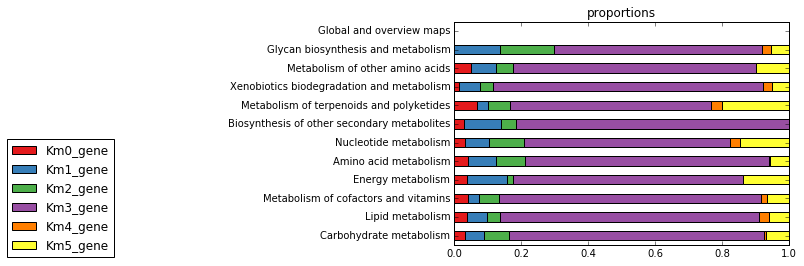

In [372]:
toPlot_genes_proportion.plot(kind = 'barh',stacked=True,color=useColors)
plt.legend(bbox_to_anchor=([-1, 0.5]))
plt.title('proportions')

current_figure = plt.gcf()
mpl.rcParams['pdf.fonttype'] = 42
current_figure.savefig('genes_proportions.pdf')

In [373]:
working = toPlot_genes.T
workingC = toPlot_cpds.T

In [374]:
working['sum'] = toPlot_genes.T.sum(axis = 1)
workingC['sum'] = toPlot_cpds.T.sum(axis=1)

In [375]:
for i in workingC.columns:
    workingC[i] = workingC[i]/workingC['sum']
workingC = workingC.T.drop('sum').T

In [376]:
for i in working.columns:
    working[i] = working[i]/working['sum']
working = working.T.drop('sum').T

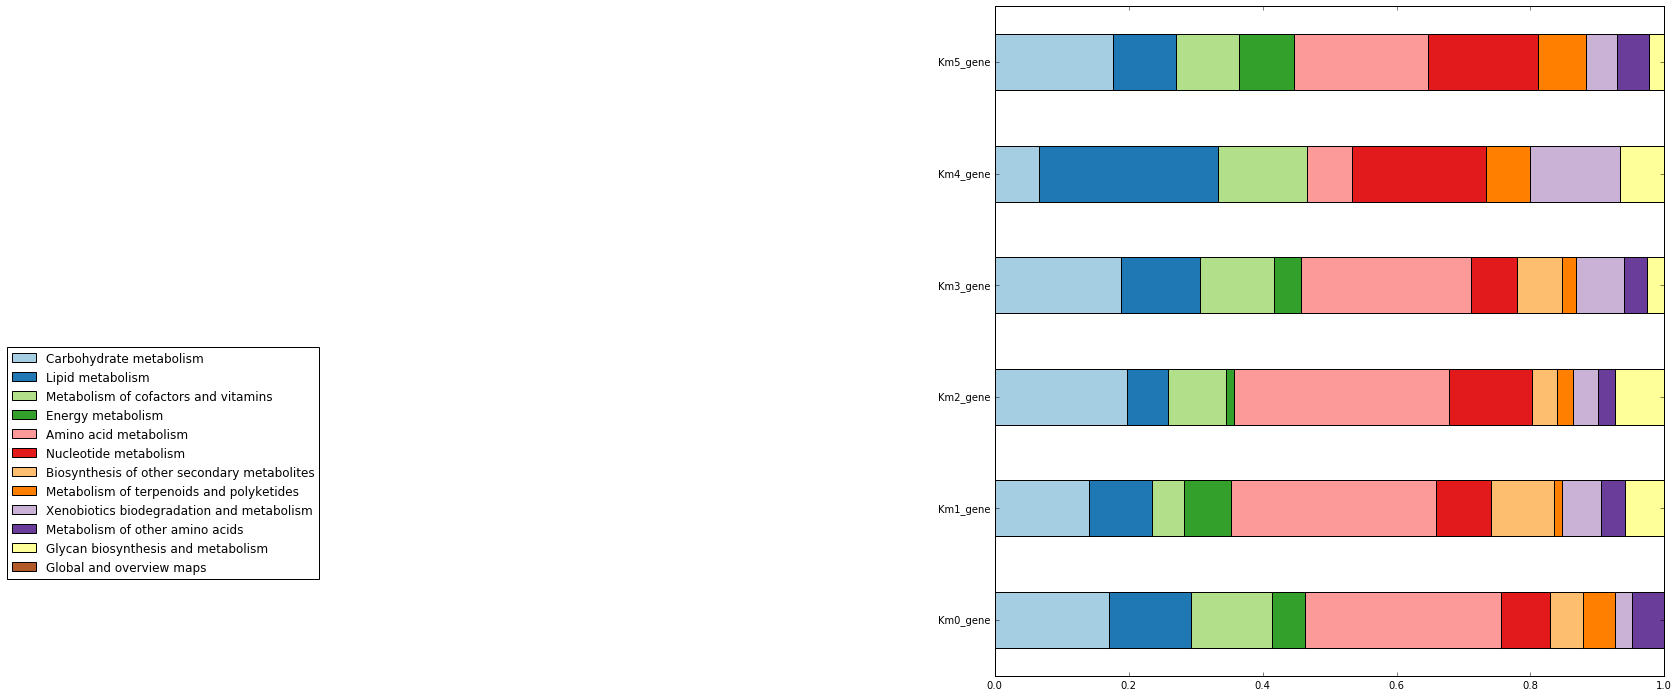

In [377]:
useColors = pal.colorbrewer.qualitative.Paired_12.hex_colors
working.plot(kind = 'barh',stacked=True,color = useColors,figsize=(12,12))
plt.legend(bbox_to_anchor=([-1, 0.5]))

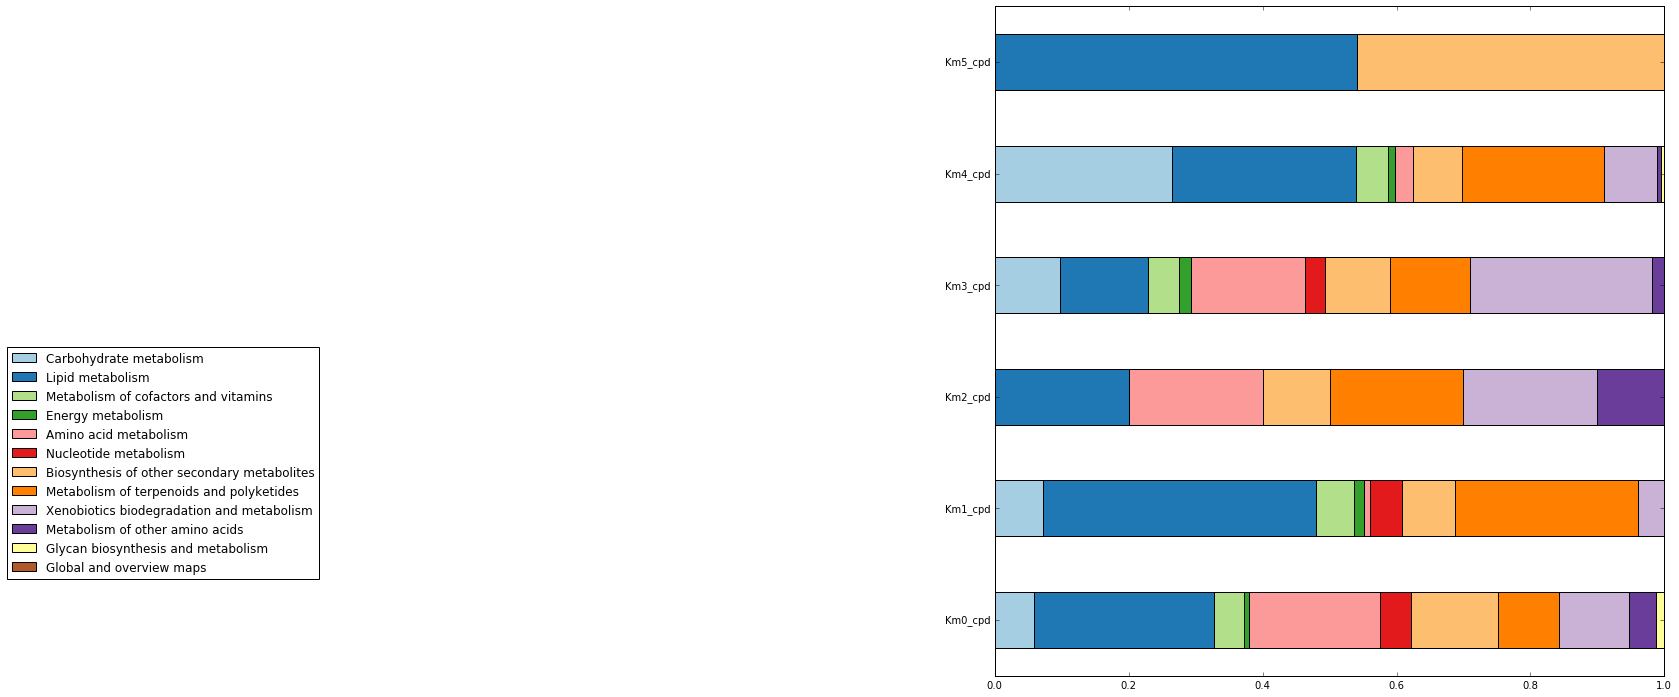

In [378]:
useColors = pal.colorbrewer.qualitative.Paired_12.hex_colors
workingC.plot(kind = 'barh',stacked=True,color = useColors,figsize=(12,12),xlim=(0,1))
plt.legend(bbox_to_anchor=([-1, 0.5]))

In [379]:
# #exported this table to a CSV file for the paper (did one for compounds too)
# toPlot_genes.to_csv('genes.csv')
# toPlot_cpds.to_csv('cpds.csv')

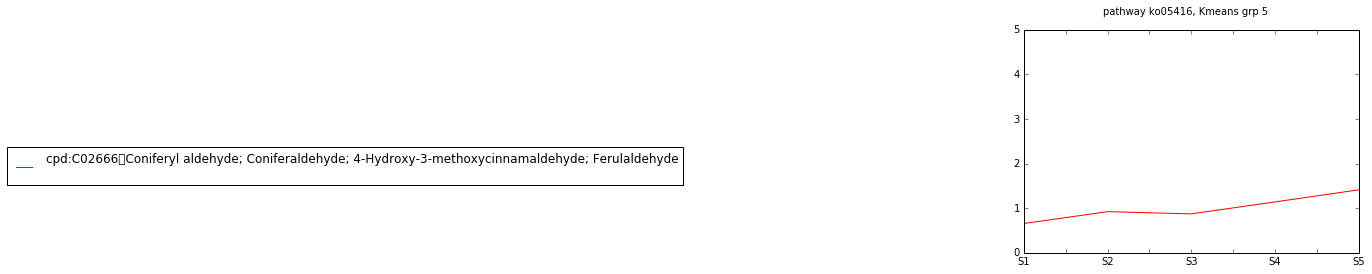

In [380]:
# plot one compound or gene (for paper)
oneCO = 'C02666'
plotOne = forRelatedness[forRelatedness['KEGG']==oneCO]
kData = plotOne.ix[:,dayList]
fig,ax = plt.subplots(1)
kData.T.plot(color = 'r',ax=ax, ylim = [0,5])

handles, labels = ax.get_legend_handles_labels()
#convert the RI numbers to COnumbers for the figure
for ia, a in enumerate(labels):
    #add compound/gene name to the legend
    ##kegg_list('C00020').read()
    #will have annoying tabs, use this to find them
    if a[0]== 'R':
        tLabel = convertRItoCO(CO_fromMATLAB,a)
        fn = kegg_list(tLabel).read()                          
        labels[ia] = fn
    elif a[0] == 'K':
        fn = kegg_list(a).read()
        labels[ia] = fn

ax.legend(handles, labels, bbox_to_anchor = ([-1, 0.5]))
fig.suptitle('pathway ' + item + ', Kmeans grp ' + str(kn))
#pngName = 'pathway' + item + '_' + m.group(0) + '_' + oneCO + '.png'
# fig.savefig(pngName)

In [381]:
shortList = ['C00020']
#note change to get values from list with multiple items
plotOne = forRelatedness.loc[forRelatedness['KEGG'].isin(shortList)]

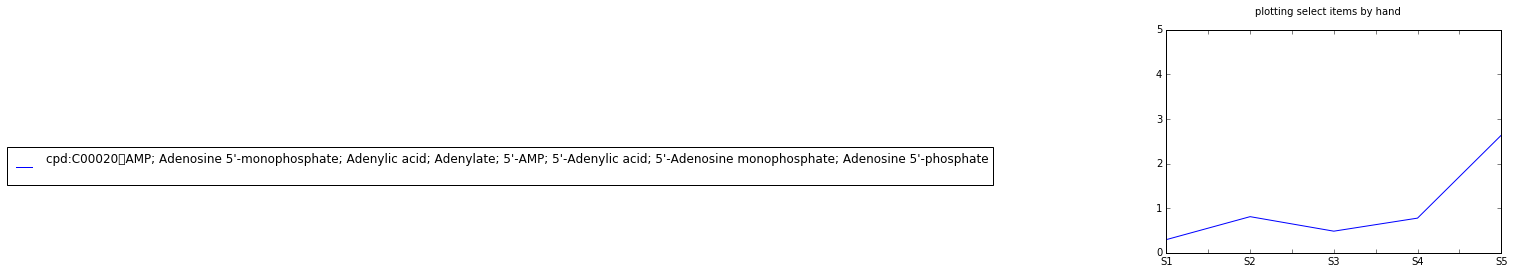

In [382]:
kData = plotOne.ix[:,dayList]
fig,ax = plt.subplots(1)
# kData.T.plot(color = 'r',ax=ax, ylim = [0,5])
kData.T.plot(ax=ax, ylim = [0,5])

handles, labels = ax.get_legend_handles_labels()
#convert the RI numbers to COnumbers for the figure
for ia, a in enumerate(labels):
    #add compound/gene name to the legend
    ##kegg_list('C00020').read()
    #will have annoying tabs, use this to find them
    if a[0]== 'R':
        tLabel = convertRItoCO(CO_fromMATLAB,a)
        fn = kegg_list(tLabel).read()                          
        labels[ia] = fn
    elif a[0] == 'K':
        fn = kegg_list(a).read()
        labels[ia] = fn

ax.legend(handles, labels, bbox_to_anchor = ([-0.5, 0.5]))
# fig.suptitle('pathway ' + item + ', Kmeans grp ' + str(kn))
fig.suptitle('plotting select items by hand')
# pngName = 'pathway' + item + '_' + m.group(0) + '_' + oneCO + '.png'
fig.savefig('AMP.pdf')

In [383]:
shortList = ['K01081']
plotOne = forRelatedness.loc[forRelatedness['KEGG'].isin(shortList)]
plotOne

,KEGG,S1,S2,S3,S4,S5,kmeans
K01081,K01081,0.477372,1.040923,1.387328,0.665968,1.428409,3


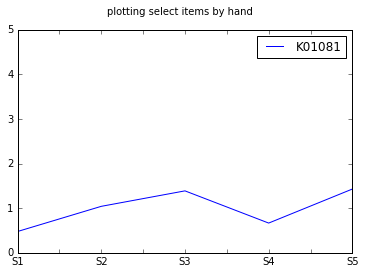

In [384]:
kData = plotOne.ix[:,dayList]
fig,ax = plt.subplots(1)
kData.T.plot(ax=ax, ylim = [0,5])

handles, labels = ax.get_legend_handles_labels()
#convert the RI numbers to COnumbers for the figure
for ia, a in enumerate(labels):
    #add compound/gene name to the legend
    ##kegg_list('C00020').read()
    #will have annoying tabs, use this to find them
    if a[0]== 'R':
        tLabel = convertRItoCO(CO_fromMATLAB,a)
        fn = kegg_list(tLabel).read()                          
        labels[ia] = fn
    elif a[0] == 'K':
        fn = kegg_list(a).read()
        labels[ia] = fn

# ax.legend(handles, labels, bbox_to_anchor = ([-1, 0.5]))
# fig.suptitle('pathway ' + item + ', Kmeans grp ' + str(kn))
fig.suptitle('plotting select items by hand')
#pdfName = 'PhenlypropanoidPathway2' + '.pdf'
#mpl.rcParams['pdf.fonttype'] = 42
#fig.savefig(pdfName)

In [385]:
#how many reactions does AMP appear in? pantothenic acid?

In [386]:
kegg_list('C00020').read()

"cpd:C00020\tAMP; Adenosine 5'-monophosphate; Adenylic acid; Adenylate; 5'-AMP; 5'-Adenylic acid; 5'-Adenosine monophosphate; Adenosine 5'-phosphate\n"

In [387]:
cpdList = kegg_link('reaction','C00020') #how many reactions does AMP participate in?

In [388]:
#set up a function to get the list of compounds for a given pathway (must be defined as ko00140 NOT map00140)
def countReactions_byCompound(c_id):
    cpdList = kegg_link('reaction',c_id).read()  # query and read the pathway
    nReactions = 0

    for line in cpdList.rstrip().split("\n"):
        nReactions = nReactions + 1
    
    return nReactions

countReactions_byCompound('C00864')

7

In [389]:
#set up a function to get the list of compounds for a given pathway (must be defined as ko00140 NOT map00140)
def countReactions_byGene(k_id):
    cpdList = kegg_link('reaction',k_id).read()  # query and read the pathway
    nReactions = 0

    for line in cpdList.rstrip().split("\n"):
        nReactions = nReactions + 1
    
    return nReactions

countReactions_byGene('K00944')

2

In [390]:
kegg_link('module','C00020').read()

'cpd:C00020\tmd:M00049\n'

In [391]:
kegg_find('module','m00049').read()

'md:M00049\tAdenine ribonucleotide biosynthesis, IMP => ADP,ATP\n'

In [392]:
kegg_find('pathway','map00230').read()

'path:map00230\tPurine metabolism\n'

In [393]:
#this provides the complete list of pathways at KEGG:
test = kegg_list('pathway')
#can see the list with this command:
#test.read()

In [394]:
# kegg_list('reaction').read()

In [395]:
kegg_find('ko','K11752').read()

'ko:K11752\tribD; diaminohydroxyphosphoribosylaminopyrimidine deaminase / 5-amino-6-(5-phosphoribosylamino)uracil reductase [EC:3.5.4.26 1.1.1.193]\n'

In [396]:
##bingo. This will provide both the genes and the compounds within a given pathway
#print kegg_get('ko00230').read()

In [397]:
kegg_link('cpd','cpd:C00020').read()

'\n'

In [398]:
kegg_link('pathway','C00020').read()

'cpd:C00020\tpath:map00230\ncpd:C00020\tpath:map00908\ncpd:C00020\tpath:map01060\ncpd:C00020\tpath:map01065\ncpd:C00020\tpath:map01070\ncpd:C00020\tpath:map01100\ncpd:C00020\tpath:map01110\ncpd:C00020\tpath:map01130\ncpd:C00020\tpath:map04022\ncpd:C00020\tpath:map04024\ncpd:C00020\tpath:map04068\ncpd:C00020\tpath:map04150\ncpd:C00020\tpath:map04151\ncpd:C00020\tpath:map04152\ncpd:C00020\tpath:map04211\ncpd:C00020\tpath:map04740\ncpd:C00020\tpath:map04742\ncpd:C00020\tpath:map04923\ncpd:C00020\tpath:map04924\ncpd:C00020\tpath:map04925\ncpd:C00020\tpath:map05012\ncpd:C00020\tpath:map05032\n'

In [399]:
kegg_link('brite','K00926').read()

'ko:K00926\tbr:ko00001\nko:K00926\tbr:ko01000\n'

In [400]:
kegg_link('brite','C00020').read()

'cpd:C00020\tbr:br08001\n'

In [405]:
#this makes a numpy.ndarray
temp = toPlot_genes.as_matrix(columns = geneCols)
type(temp)

numpy.ndarray

In [406]:
#this will also make a numpy.ndarray
temp = toPlot_genes.values
type(temp)

numpy.ndarray

In [407]:
#pluck code from Harriet, trim down a bit, need a few pieces
import palettable.colorbrewer as b2m
from matplotlib.colors import LogNorm, NoNorm, BoundaryNorm

In [408]:
#this will make a pandas DataFrame ...which is what I need for the Heatmap code I have
# data = toPlot_genes
data = toPlot_cpds_proportion
type(data)

pandas.core.frame.DataFrame

In [409]:
# The global and overview maps will be empty, so get rid of it
data = data.drop(['Global and overview maps'])

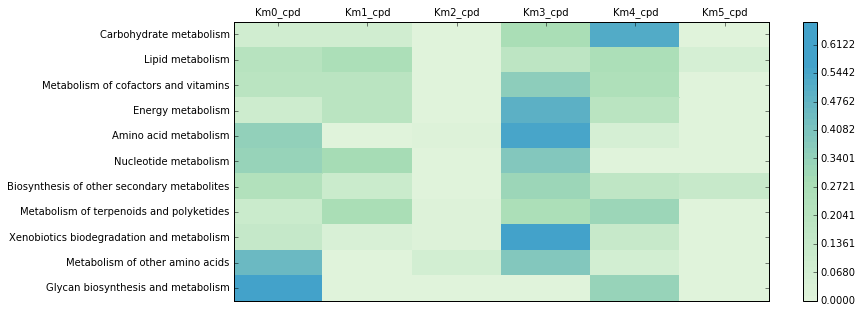

In [410]:
def HeatMap(heatmapData, columns=None,colormap=b2m.sequential.GnBu_3.get_mpl_colormap(), m=1e-5):
    #note - m in the above function is a small, but non-zero number, allows the LogNorm function to work
    #clean up the data to make a pretty heatmap
    heatmapData['mean']=heatmapData.mean(skipna = 1, axis=1) #calculate mean value for each class
    heatmapData=heatmapData.sort_values(by='mean', ascending=False)#Sort by the mean value
    heatmapData=heatmapData.drop('mean',1) #drop mean column
    heatmapData=heatmapData.loc[heatmapData.sum(axis=1)!=0]

    col_labels=list(heatmapData.index)
    row_labels=list(heatmapData.columns.values)
    fig3,ax3=plt.subplots()
    fig3.set_figheight(len(col_labels)/2)
    fig3.set_figwidth(len(row_labels)*2)
    
    #this works, but looks like one color until I start increasing ncolors to bigger numbers...
    bounds = np.linspace(heatmapData.min().min() ,heatmapData.max().max())
    heatmap3 = ax3.pcolor(heatmapData, cmap=colormap, norm=BoundaryNorm(boundaries = bounds,ncolors=300))
       
    ax3.set_xticks(np.arange(heatmapData.shape[1])+0.5, minor=False)
    ax3.set_yticks(np.arange(heatmapData.shape[0])+0.5, minor=False)
    ax3.invert_yaxis()
    ax3.xaxis.tick_top()
    ax3.margins(0,0)

    ax3.set_xticklabels(row_labels, minor=False)
    ax3.set_yticklabels(col_labels, minor=False)
    plt.colorbar(heatmap3)
    plt.show()
    return fig3


Testing=HeatMap(data)
#Testing.savefig('Insitu_KEGG_Heatmap.pdf')

In [411]:
data = forRelatedness.loc[:,dayList].values

In [412]:
type(data)

numpy.ndarray

In [413]:
#the next plots work with numpy.ndarray

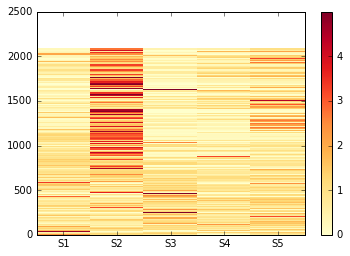

In [414]:

row_labels = list(dayList)
fig,ax = plt.subplots()
heatmap = ax.pcolor(data,cmap = 'YlOrRd')

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)

cbar = fig.colorbar(heatmap,ticks = range(5))

plt.show()

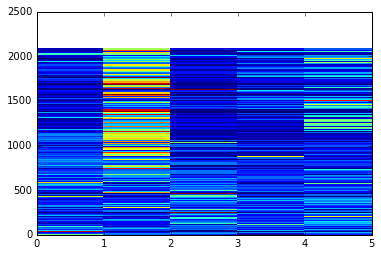

In [415]:
plt.pcolor(data)

In [421]:
##let's narrow in on the metabolism group since that is the only one that is really interesting
plotMetabolism = gatherCounts[gatherCounts.loc[:,'pathwayGroup_A']=='Metabolism']

s = plotMetabolism[(plotMetabolism.loc[:,newCols].values > 0).any(axis=1)]
dataToPlot = s.loc[:,newCols]

pGroup = pd.unique(plotMetabolism.pathwayGroup_B.ravel())

newDFmtab = pd.DataFrame(index = pGroup,columns = newCols)

for i, group in s.groupby('pathwayGroup_C'):
    d2 = group.loc[:,newCols]
    out = d2.sum(axis=0)
    newDFmtab.loc[i,newCols] = out
    
#this next line is the part that selects compounds or genes    
# toPlot_heatmap = newDFmtab.loc[:,cpdCols]
toPlot_heatmap = newDFmtab.loc[:,geneCols]


# The global and overview maps will be empty, so get rid of it
toPlot_heatmap = toPlot_heatmap.drop(['Global and overview maps'])

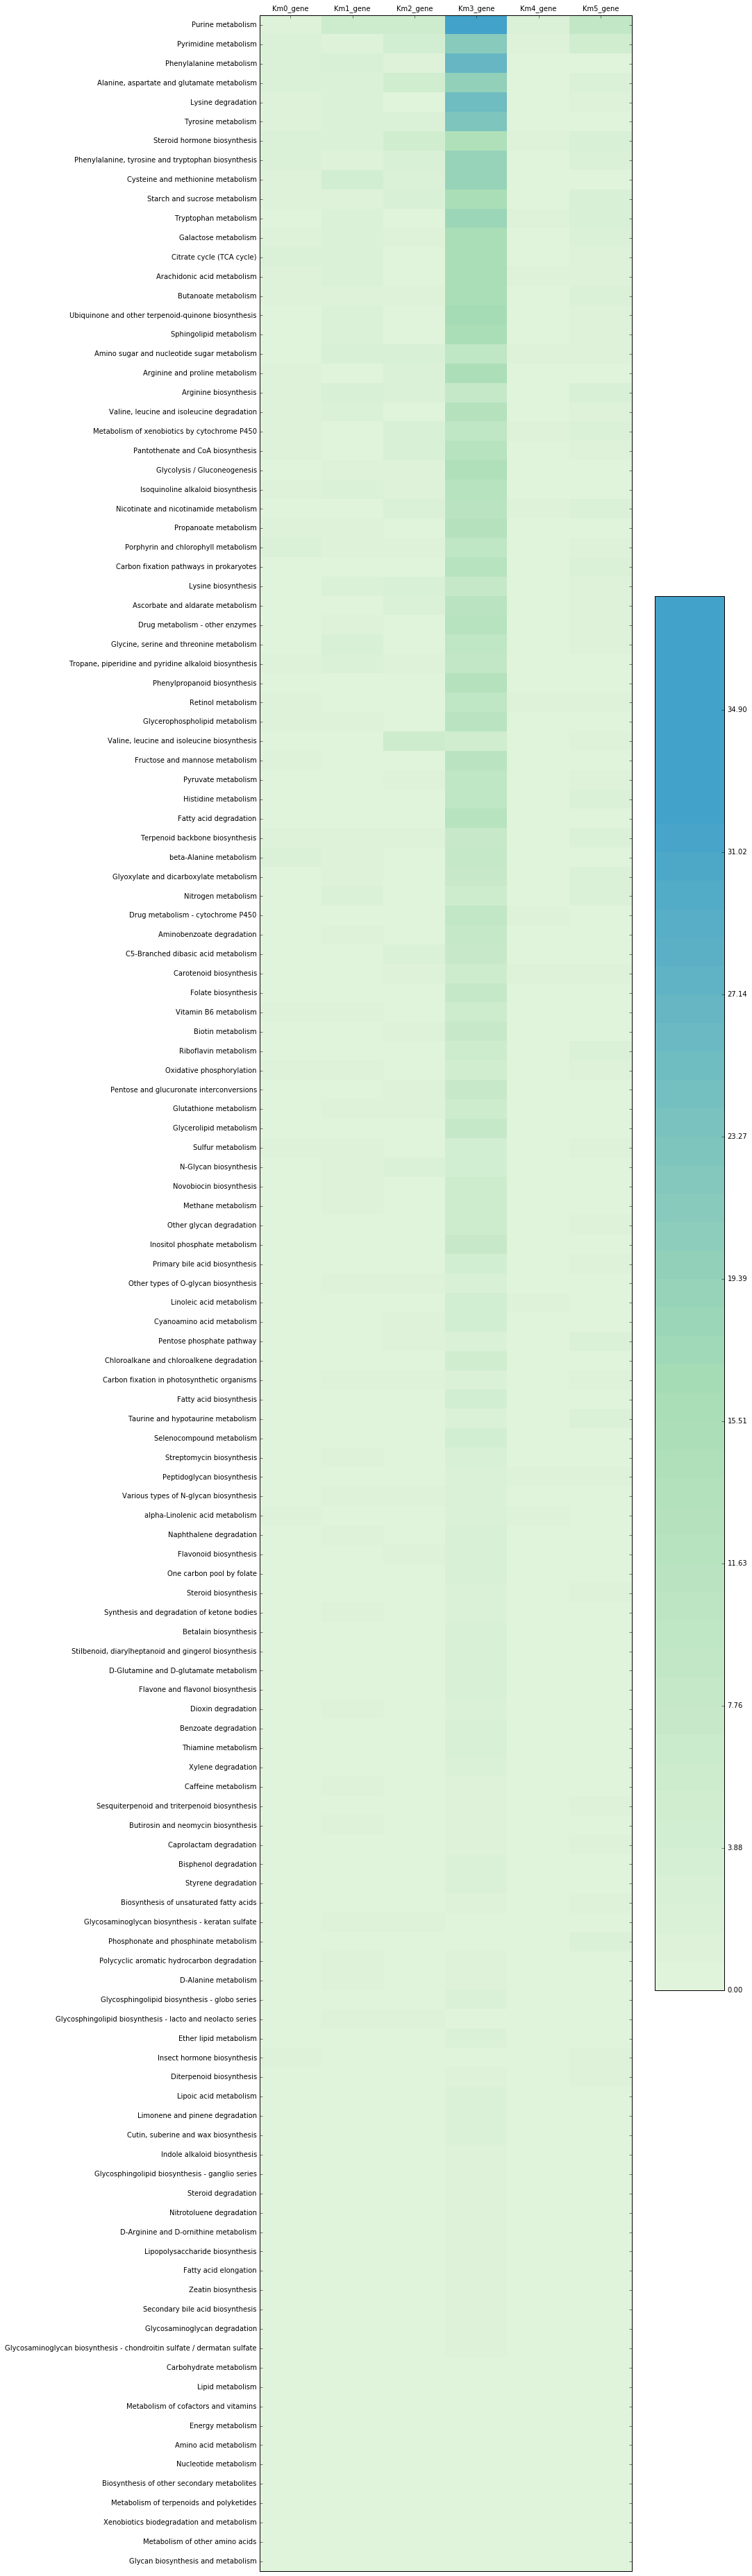

In [422]:
Testing=HeatMap(toPlot_heatmap)

In [425]:
#consider different options for the heat map...average value per row? normalize to maximum value?


In [457]:
##let's narrow in on the metabolism group since that is the only one that is really interesting
plotMetabolism = gatherCounts[gatherCounts.loc[:,'pathwayGroup_A']=='Metabolism']

s = plotMetabolism[(plotMetabolism.loc[:,newCols].values > 0).any(axis=1)]
dataToPlot = s.loc[:,newCols]

pGroup = pd.unique(plotMetabolism.pathwayGroup_B.ravel())

newDFmtab = pd.DataFrame(index = pGroup,columns = newCols)

for i, group in s.groupby('pathwayGroup_B'): #pathwayGroup_C is the most detailed rendition
    d2 = group.loc[:,newCols]
    out = d2.sum(axis=0)
    newDFmtab.loc[i,newCols] = out
    
#this next line is the part that selects compounds or genes    
# toPlot_heatmap = newDFmtab.loc[:,cpdCols]
toPlot_heatmap = newDFmtab.loc[:,geneCols]


# The global and overview maps will be empty, so get rid of it
toPlot_heatmap = toPlot_heatmap.drop(['Global and overview maps'])

In [451]:
toPlot_heatmap.max()

Km0_cpd    41
Km1_cpd    51
Km2_cpd     2
Km3_cpd    75
Km4_cpd    52
Km5_cpd    13
dtype: float64

In [452]:
toPlot_heatmap.min()

Km0_cpd    1
Km1_cpd    0
Km2_cpd    0
Km3_cpd    0
Km4_cpd    0
Km5_cpd    0
dtype: float64

In [ ]:
#to normalize to mean, take advantage of the function Harriet already wrote...
out = NormalizeToMean(toPlot_heatmap)

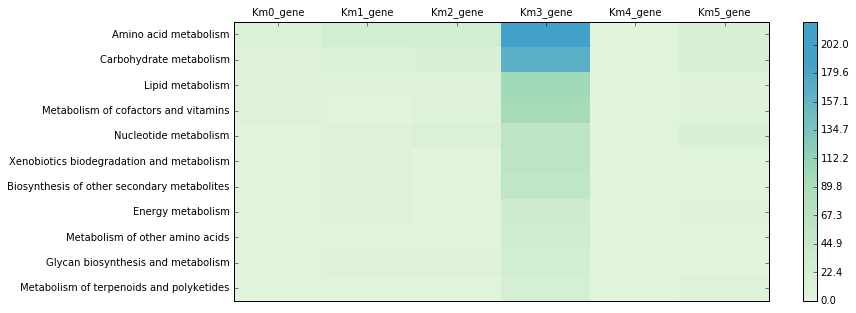

In [458]:
def HeatMap(heatmapData, columns=None,colormap=b2m.sequential.GnBu_3.get_mpl_colormap()):
    #use the data to sort the rows in the heatmap (not actually changing the data except to delete empty rows)
    heatmapData['mean']=heatmapData.mean(skipna = 1, axis=1) #calculate mean value for each class
    heatmapData=heatmapData.sort_values(by='mean', ascending=False)#Sort by the mean value
    heatmapData=heatmapData.drop('mean',1) #drop mean column
    heatmapData=heatmapData.loc[heatmapData.sum(axis=1)!=0] #get rid of rows with zeros

    
    col_labels=list(heatmapData.index)
    row_labels=list(heatmapData.columns.values)
    fig3,ax3=plt.subplots()
    fig3.set_figheight(len(col_labels)/2)
    fig3.set_figwidth(len(row_labels)*2)
    
    #this works, but I haven't quite figured out the best values for the colors (though I like the green/blue)
    bounds = np.linspace(heatmapData.min().min() ,heatmapData.max().max())
    heatmap3 = ax3.pcolor(heatmapData, cmap=colormap, norm=BoundaryNorm(boundaries = bounds,ncolors=300))
       
    ax3.set_xticks(np.arange(heatmapData.shape[1])+0.5, minor=False)
    ax3.set_yticks(np.arange(heatmapData.shape[0])+0.5, minor=False)
    ax3.invert_yaxis()
    ax3.xaxis.tick_top()
    ax3.margins(0,0)

    ax3.set_xticklabels(row_labels, minor=False)
    ax3.set_yticklabels(col_labels, minor=False)
    plt.colorbar(heatmap3)
    plt.show()
    return fig3


Testing=HeatMap(toPlot_heatmap)
Testing.savefig('testing.png', bbox_inches = 'tight')
                            
# Testing.savefig('Testing_Heatmap.pdf')